# Exploration de la fonction sinus

Soit la fonction $x = A\sin(\omega t + \phi)$ où:

- $A$ est l'amplitude
- $\omega$ est la fréquence angulaire
- $\phi$ est la constante de phase.

ToggleButton(value=True, description='Hide code')

Checkbox(value=False, description='cosinus')

<IPython.core.display.Javascript object>


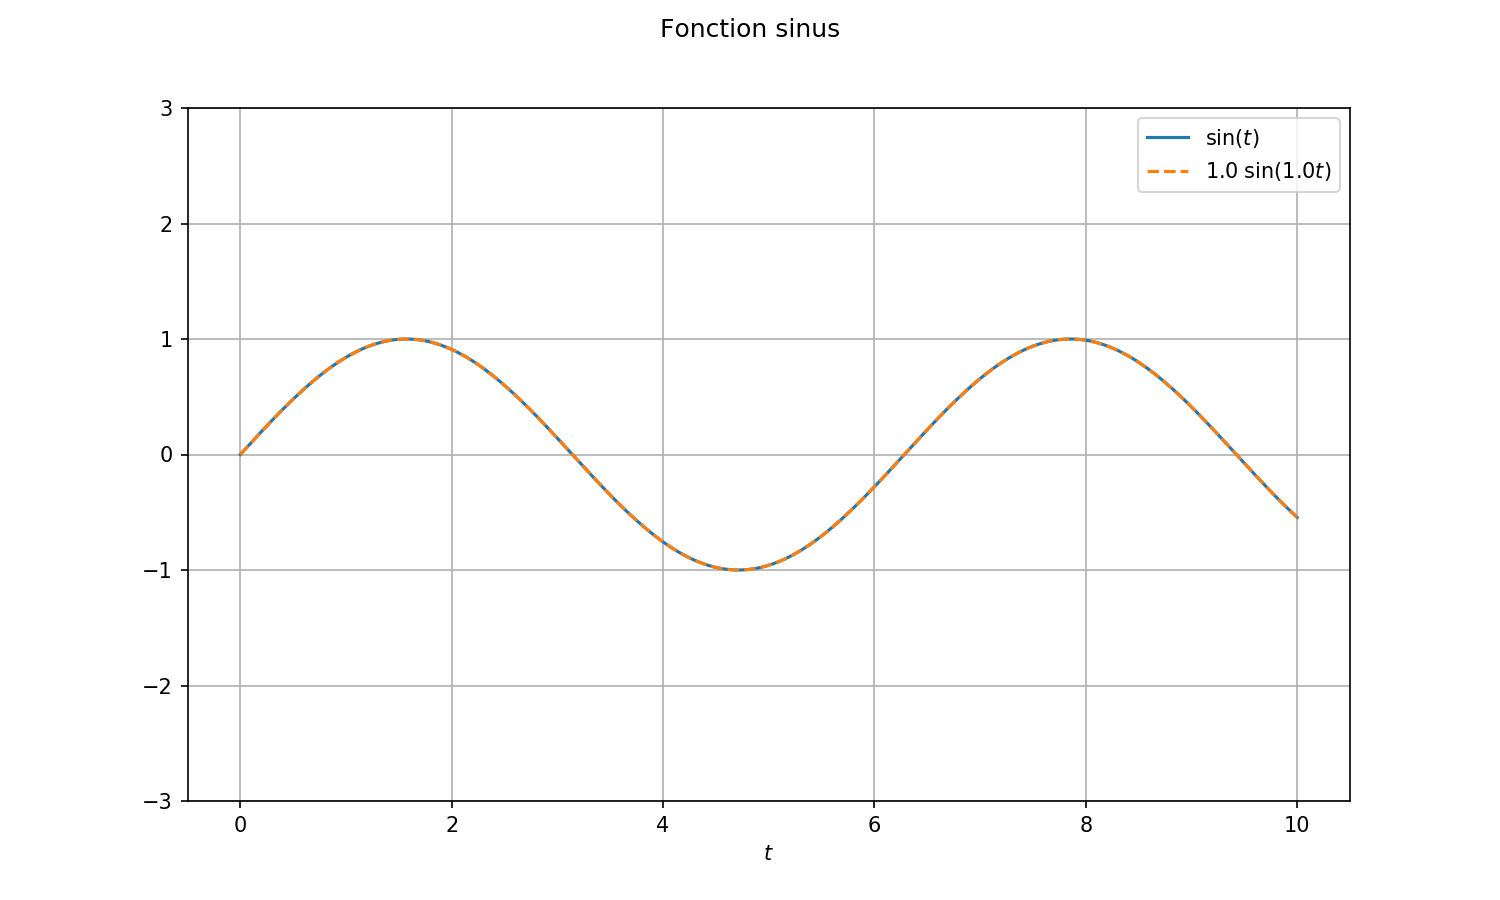

interactive(children=(FloatSlider(value=1.0, description='A', max=10.0, min=0.01), FloatSlider(value=1.0, desc…

In [1]:
import math
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np


javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = True
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

cosine_button = widgets.Checkbox(False, description="cosinus")
display(cosine_button)


%matplotlib notebook

t = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(1, figsize=(10, 6))
plt.suptitle("Fonction sinus")

def update_plot(amp, omega, phi, show_cos):
    """
    This function is will be updated whenever the value of the sliders will be changed.
    """
    ax.clear()
    x = amp * np.sin(omega*t + phi)
    sin = np.sin(t)
    cos = np.cos(t)
    
    if phi > 0:
        phi = f"+ {phi}"
    elif phi == 0:
        phi = ""
    legend_x = f"${amp}\;\sin({omega} t {phi})$"
    
    legend_sin = "$\sin(t)$"
    legend_cos = "$\cos(t)$"
    ax.plot(t, sin, label=legend_sin)
    ax.plot(t, x, label=legend_x, linestyle='--')
    if show_cos:
        ax.plot(t, cos, label=legend_cos)
    ax.legend(loc=1)    
    ax.set_ylim(-3, 3)
    ax.set_xlabel("$t$")
    plt.grid()
    plt.show()
    
amp = widgets.FloatSlider(min=0.01, max=10, value=1, description="A")
omega = widgets.FloatSlider(min=0.01, max=10, value=1, description="$\omega$")
phi = widgets.FloatSlider(min=-2*math.pi, max=2*math.pi, value=0, description="$\phi$")

widgets.interactive(update_plot, amp=amp, omega=omega, phi=phi, show_cos=cosine_button)
